# Machine Learning Report

Este proyecto de machine learning se centra principalmente en la exploracion y entrenamientos de modelos los cuales nos ayudaran a tomar una mejor decision en la cestion financiera en este caso de la empresa APPL (apple inc), tomando en cuenta los precios de cierre para de ahi partir en el analisis.

In [1]:
import pandas as pd 
import ta
import optuna
import time
from multiprocessing import Pool
import plotly.graph_objects as go
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
            

c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
random=1234
url = "https://raw.githubusercontent.com/Rerris/Technical_Analysis_Proyect/main/data/aapl_1d_test.csv"

In [3]:
def get_data(url):
    response = requests.get(url, verify=True)
    data = pd.read_csv(StringIO(response.text))
    data=data["Close"]
    data=pd.DataFrame(data)
    data["Closet-1"]=data["Close"].shift(-1)
    data["Closet-2"]=data["Close"].shift(-2)
    rsi_indicator = ta.momentum.RSIIndicator(close=data['Close'], window=14)
    data['RSI'] = rsi_indicator.rsi()
    #MACD
    macd_indicator = ta.trend.MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
    data['macd'] = macd_indicator.macd()
    data['macd_signal'] = macd_indicator.macd_signal()

    # Crear instancia del indicador EMA con períodos de 13 y 48
    ema_13_indicator = ta.trend.EMAIndicator(close=data['Close'], window=13)
    ema_48_indicator = ta.trend.EMAIndicator(close=data['Close'], window=48)
        
    # Calcular las EMAs 13 y 48 
    data['Ema 13'] = ema_13_indicator.ema_indicator()
    data['Ema 48'] = ema_48_indicator.ema_indicator()
    # Inicializar el indicador EMA con una ventana de 200 períodos
    ema_indicator = ta.trend.EMAIndicator(close=data['Close'], window=200)
    # Calcular la EMA 200

    data['Ema 200'] = ema_indicator.ema_indicator()
    data["Long"] = False
    data["Short"] = False

    for i in range(len(data["Close"])):

        if i + 10 < len(data["Close"]):
            if data["Close"][i] > data["Close"][i + 10]:
                data.loc[i, "Long"] = True
            elif data["Close"][i] < data["Close"][i + 10]:
                data.loc[i, "Short"] = True
    data=data
    return data

# %%        
data=get_data(url).iloc[200:]

# %%
def logistic_regression_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    model = LogisticRegression()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Imprimir el informe de clasificación
    #print(classification_report(y_test, y_pred))

# %%
logistic_regression_long(data)

# %%
def logistic_regression_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el modelo de regresión logística
    model = LogisticRegression()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Imprimir el informe de clasificación
    #print(classification_report(y_test, y_pred))

# %%
logistic_regression_short(data)

# %%
def support_vector_machine_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el clasificador SVM
    clf = svm.SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades (lineal, polinomial, RBF, etc.)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
support_vector_machine_long(data)
# %%
def support_vector_machine_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar el clasificador SVM
    clf = svm.SVC(kernel='linear')  # Puedes cambiar el kernel según tus necesidades (lineal, polinomial, RBF, etc.)

    # Entrenar el modelo
    clf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
support_vector_machine_short(data)

# %%
def XGBoost_long(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Long']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir los datos a un formato específico para XGBoost (DMatrix)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Definir los parámetros del modelo
    params = {
        'objective': 'binary:logistic',  # Problema de clasificación binaria
        'eval_metric': 'logloss',  # Métrica de evaluación
        'eta': 0.1,  # Tasa de aprendizaje
        'max_depth': 6,  # Profundidad máxima del árbol
        'subsample': 0.8,  # Proporción de muestras utilizadas para entrenar cada árbol
        'colsample_bytree': 0.8  # Proporción de características utilizadas para entrenar cada árbol
    }

    # Entrenar el modelo
    num_round = 100  # Número de iteraciones de entrenamiento (número de árboles)
    model = xgb.train(params, dtrain, num_round)

    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convertir probabilidades en etiquetas binarias

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
# %%
XGBoost_long(data)
# %%
def XGBoost_short(data):

    X = data[['RSI', 'Ema 13', 'Ema 200']]
    y = data['Short']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convertir los datos a un formato específico para XGBoost (DMatrix)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Definir los parámetros del modelo
    params = {
        'objective': 'binary:logistic',  # Problema de clasificación binaria
        'eval_metric': 'logloss',  # Métrica de evaluación
        'eta': 0.1,  # Tasa de aprendizaje
        'max_depth': 6,  # Profundidad máxima del árbol
        'subsample': 0.8,  # Proporción de muestras utilizadas para entrenar cada árbol
        'colsample_bytree': 0.8  # Proporción de características utilizadas para entrenar cada árbol
    }

    # Entrenar el modelo
    num_round = 100  # Número de iteraciones de entrenamiento (número de árboles)
    model = xgb.train(params, dtrain, num_round)

    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]  # Convertir probabilidades en etiquetas binarias

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

# %%
XGBoost_short(data)

Accuracy: 0.5315315315315315
Accuracy: 0.5405405405405406
Accuracy: 0.5675675675675675
Accuracy: 0.5405405405405406
Accuracy: 0.8648648648648649
Accuracy: 0.8648648648648649


<Axes: >

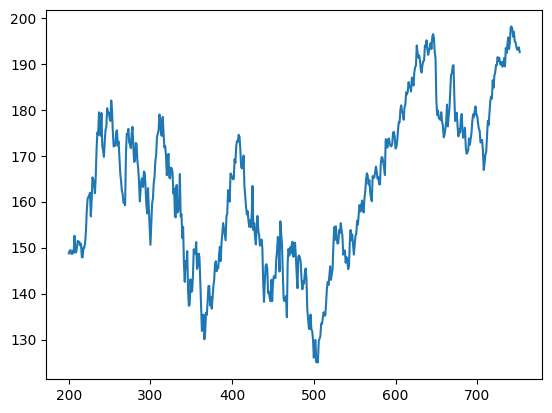

In [4]:
data["Close"].plot()

#### Modelos utilizados dentro de las funciones
Los modelos utilizados fueron ("XGBoost","support vector machine long","Loistic Regression")

Podemos observar el accuracy que tienen nuestros modelos ya siendo entrenados y testeados ajustados a los parametros previamente establecidos tales como "Problema de clasificación binaria, Métrica de evaluación, Tasa de aprendizaje, Profundidad máxima del árbol, Proporción de muestras, Proporción de características utilizadas para entrenar cada árbol utilizadas para entrenar cada árbol"

In [5]:
data

,Close,Closet-1,Closet-2,RSI,macd,macd_signal,Ema 13,Ema 48,Ema 200,Long,Short
200,148.76,149.26,149.48,60.064144,-0.387048,-1.214695,144.366068,145.033400,138.376440,False,True
201,149.26,149.48,148.69,61.062292,0.029030,-0.965950,145.065201,145.205915,138.484734,False,True
202,149.48,148.69,148.64,61.518042,0.372237,-0.698313,145.695887,145.380367,138.594140,False,True
203,148.69,148.64,149.32,58.854117,0.573869,-0.443876,146.123617,145.515454,138.694596,False,True
204,148.64,149.32,148.85,58.680919,0.721314,-0.210838,146.483100,145.642987,138.793555,False,True
...,...,...,...,...,...,...,...,...,...,...,...
748,193.60,193.05,193.15,54.609704,2.636316,3.236689,194.600511,188.472310,177.514883,False,False
749,193.05,193.15,193.58,53.026881,2.306308,3.050613,194.379009,188.659155,177.669462,False,False
750,193.15,193.58,192.53,53.291960,2.029448,2.846380,194.203437,188.842454,177.823497,False,False
751,193.58,192.53,NaN,54.481471,1.823710,2.641846,194.114374,189.035824,177.980278,False,False


## Optimizacion 
una vez que ya tenemos los parametros de los modelos establecidos podemos pasar a la parte del entrenamiento y test (el cual esta dentro de cada un a de las funciones) posteriormente pasamos a la etapa de optimizacion de parametros para consegir un mejor resultado

In [6]:
# Optimizing using "Long" as the target variable
X = data[['RSI', 'Ema 13', 'Ema 200']]
y = data['Long']

# Optimizing Logistic Regression
def optimize_logistic_regression(trial):
    C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
    max_iter = trial.suggest_int('max_iter', 100, 1000) # Maximum number of iterations
    
    model = LogisticRegression(C=C, max_iter=max_iter)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Optimizing SVM
def optimize_svm(trial):
    C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']) # Kernel type
    
    model = svm.SVC(C=C, kernel=kernel)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Optimizing XGBoost
def optimize_xgboost(trial):
    eta = trial.suggest_loguniform('eta', 0.01, 0.1) # Learning rate
    max_depth = trial.suggest_int('max_depth', 3, 10) # Maximum depth of the tree
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0) # Subsample ratio of the training instances
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0) # Subsample ratio of columns when constructing each tree
    
    model = xgb.XGBClassifier(eta=eta, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Ojective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['logistic_regression', 'svm', 'xgboost'])
    
    if model_name == 'logistic_regression':
        return optimize_logistic_regression(trial)
    elif model_name == 'svm':
        return optimize_svm(trial)
    elif model_name == 'xgboost':
        return optimize_xgboost(trial)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) # We decided to do 100 trials becasue we noticed that the the study convverges

# Get the best hyperparameters and corresponding score
best_params = study.best_trial.params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Print optimal hyperparameters
for param, value in best_params.items():
    print(f"Optimal {param}: {value}")

# %%
# Optimizing using "Short" as the target variable
X = data[['RSI', 'Ema 13', 'Ema 200']]
y = data['Short']

# Optimizing Logistic Regression
def optimize_logistic_regression(trial):
    C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
    max_iter = trial.suggest_int('max_iter', 100, 1000) # Maximum number of iterations
    
    model = LogisticRegression(C=C, max_iter=max_iter)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Optimizing SVM
def optimize_svm(trial):
    C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']) # Kernel type
    
    model = svm.SVC(C=C, kernel=kernel)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Optimizing XGBoost
def optimize_xgboost(trial):
    eta = trial.suggest_loguniform('eta', 0.01, 0.1) # Learning rate
    max_depth = trial.suggest_int('max_depth', 3, 10) # Maximum depth of the tree
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0) # Subsample ratio of the training instances
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0) # Subsample ratio of columns when constructing each tree
    
    model = xgb.XGBClassifier(eta=eta, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree)
    scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation
    
    return scores.mean()

# Ojective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['logistic_regression', 'svm', 'xgboost'])
    
    if model_name == 'logistic_regression':
        return optimize_logistic_regression(trial)
    elif model_name == 'svm':
        return optimize_svm(trial)
    elif model_name == 'xgboost':
        return optimize_xgboost(trial)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) # We decided to do 100 trials becasue we noticed that the the study converges

# Get the best hyperparameters and corresponding score
best_params = study.best_trial.params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Print optimal hyperparameters
for param, value in best_params.items():
    print(f"Optimal {param}: {value}")


[I 2024-03-10 12:39:28,657] A new study created in memory with name: no-name-aca42bc9-b810-4f35-9dd0-cbb2996d99cb
C:\Users\pabul\AppData\Local\Temp\ipykernel_12220\2016906531.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
[I 2024-03-10 12:39:28,737] Trial 0 finished with value: 0.46429156429156426 and parameters: {'model': 'logistic_regression', 'C': 1.1705054224661229, 'max_iter': 937}. Best is trial 0 with value: 0.46429156429156426.
C:\Users\pabul\AppData\Local\Temp\ipykernel_12220\2016906531.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 10) # Re

Best Hyperparameters: {'model': 'svm', 'C': 0.22246297997092598, 'kernel': 'rbf'}
Best Score: 0.5967567567567567
Optimal model: svm
Optimal C: 0.22246297997092598
Optimal kernel: rbf


[I 2024-03-10 12:39:45,393] Trial 1 finished with value: 0.5291728091728092 and parameters: {'model': 'svm', 'C': 8.630169820466712, 'kernel': 'rbf'}. Best is trial 1 with value: 0.5291728091728092.
C:\Users\pabul\AppData\Local\Temp\ipykernel_12220\2016906531.py:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.01, 10) # Regularization parameter
[I 2024-03-10 12:39:45,446] Trial 2 finished with value: 0.5023095823095823 and parameters: {'model': 'logistic_regression', 'C': 7.00920020742604, 'max_iter': 738}. Best is trial 1 with value: 0.5291728091728092.
C:\Users\pabul\AppData\Local\Temp\ipykernel_12220\2016906531.py:70: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugges

Best Hyperparameters: {'model': 'svm', 'C': 0.12802338193322102, 'kernel': 'rbf'}
Best Score: 0.5986732186732187
Optimal model: svm
Optimal C: 0.12802338193322102
Optimal kernel: rbf


Aplicamos optimizacion deparametros para las señales de compra "Long" y " Short".

En esta pare se optimizan cada uno de los modelos para obtener nuestros mejores parametros los cuales engloban ("Hyperparametros", "Score", "Modelo optimo", nuestra C optima y el Kernel optimo)

Podemos observar que para Long nuestro modelo optimo fue SVM "Support Vector Machine" y nuestro mejor score fue de 59.67%.
y para nuestros Short Igualmente el mejor modelo fue SVM con un score de 59.86%

### Backtesting
Pasamos a la etapa de realizar el backtest y posteriormente probar nuestros modelos

In [8]:
def backtest_logistic_regression(data, model, target, take_profit, stop_loss, initial_capital):
    # Crear una copia de los datos
    data = data.copy()
    
    # Crear una nueva columna con las predicciones del modelo
    data['Prediction'] = model.predict(data[['RSI', 'Ema 13', 'Ema 200']])
    
    # Calcular el rendimiento diario
    data['Return'] = data['Closet-1'] / data['Close'] - 1
    
    # Calcular el rendimiento diario de la estrategia
    data['Strategy Return'] = data['Return'] * data['Prediction']
    
    # Calcular el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'] = (data['Strategy Return'] + 1).cumprod()
    
    # Inicializar el capital
    capital = initial_capital
    
    # Inicializar el estado de la operación
    in_trade = False
    
    # Inicializar el precio de entrada
    entry_price = 0
    
    # Recorrer los datos
    for i in range(len(data)):
        # Si estamos en una operación
        if in_trade:
            # Si alcanzamos el take profit o el stop loss
            if data['Close'].iloc[i] >= entry_price * (1 + take_profit) or data['Close'].iloc[i] <= entry_price * (1 - stop_loss):
                # Salir de la operación
                in_trade = False
        # Si no estamos en una operación y el modelo predice una entrada
        elif data['Prediction'].iloc[i] == 1:
            # Entrar en la operación
            in_trade = True
            entry_price = data['Close'].iloc[i]
            capital -= entry_price  # Descontar el precio de entrada del capital
    
    # Graficar el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'].plot(figsize=(10, 6))
    plt.title(f'Cumulative Strategy Return ({target})')
    plt.show()
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(data[target], data['Prediction'])
    print("Accuracy:", accuracy)
    
    # Imprimir el informe de clasificación
    print(classification_report(data[target], data['Prediction']))
    
    # Imprimir la matriz de confusión
    print("Confusion Matrix:")
    print(confusion_matrix(data[target], data['Prediction']))
    
    # Imprimir el capital final
    print("Final capital:", capital)

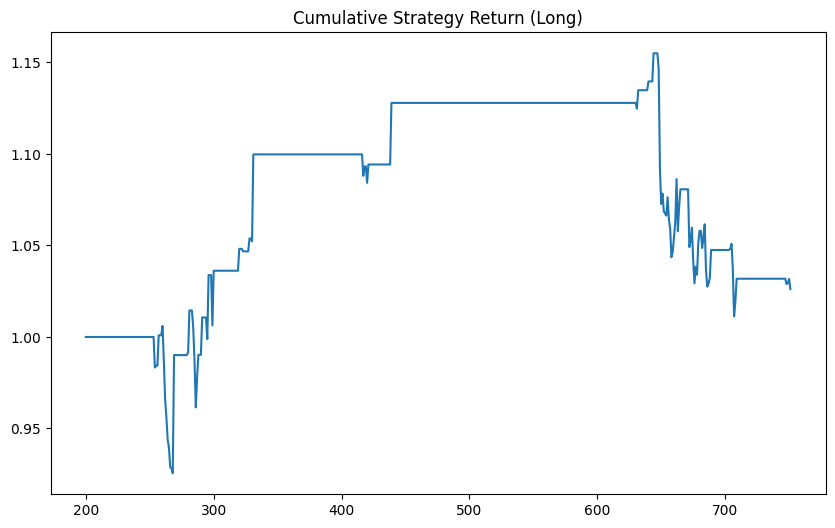

Accuracy: 0.5804701627486437
              precision    recall  f1-score   support

       False       0.60      0.86      0.71       329
        True       0.45      0.17      0.25       224

    accuracy                           0.58       553
   macro avg       0.53      0.52      0.48       553
weighted avg       0.54      0.58      0.52       553

Confusion Matrix:
[[282  47]
 [185  39]]
Final capital: 96614.32999999999


In [9]:
# Probar la estrategia con el modelo de regresión logística para "Long"
model = LogisticRegression(C=0.01, max_iter=100)
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Long'])
backtest_logistic_regression(data, model, 'Long', 0.05, 0.02, 100000)


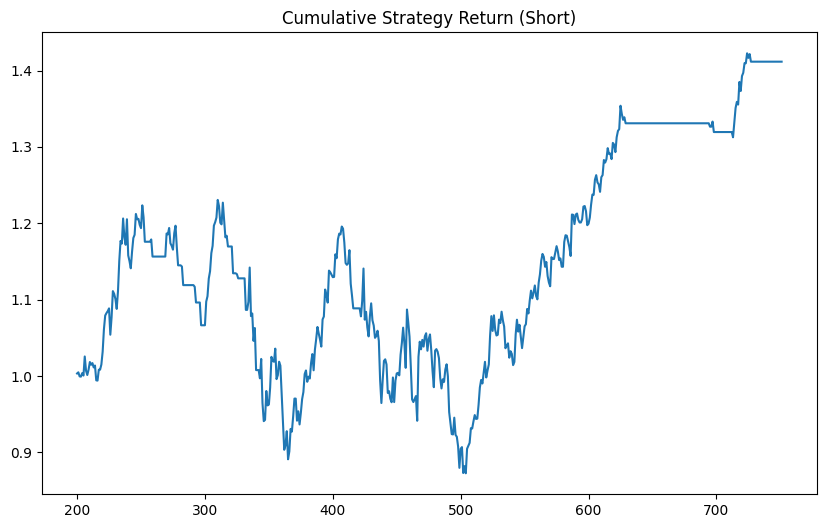

Accuracy: 0.6075949367088608
              precision    recall  f1-score   support

       False       0.56      0.36      0.44       234
        True       0.63      0.79      0.70       319

    accuracy                           0.61       553
   macro avg       0.59      0.58      0.57       553
weighted avg       0.60      0.61      0.59       553

Confusion Matrix:
[[ 85 149]
 [ 68 251]]
Final capital: 90144.92000000003


In [10]:
# Probar la estrategia con el modelo de regresión logística para "Short"
model = LogisticRegression(C=0.01, max_iter=100)
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Short'])
backtest_logistic_regression(data, model, 'Short', 0.05, 0.02, 100000)

In [11]:
#Funcion de backtest para SVM

def backtest_svm(data, model, target, take_profit, stop_loss, initial_capital):
    # Crear una copia de los datos
    data = data.copy()
    
    # Crear una nueva columna con las predicciones del modelo
    data['Prediction'] = model.predict(data[['RSI', 'Ema 13', 'Ema 200']])
    
    # Calcular el rendimiento diario
    data['Return'] = data['Closet-1'] / data['Close'] - 1
    
    # Calcular el rendimiento diario de la estrategia
    data['Strategy Return'] = data['Return'] * data['Prediction']
    
    # Calcular el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'] = (data['Strategy Return'] + 1).cumprod()
    
    # Inicializar el capital
    capital = initial_capital
    
    # Inicializar el estado de la operación
    in_trade = False
    
    # Inicializar el precio de entrada
    entry_price = 0
    
    # Recorrer los datos
    for i in range(len(data)):
        # Si estamos en una operación
        if in_trade:
            # Si alcanzamos el take profit o el stop loss
            if data['Close'].iloc[i] >= entry_price * (1 + take_profit) or data['Close'].iloc[i] <= entry_price * (1 - stop_loss):
                # Salir de la operación
                in_trade = False
        # Si no estamos en una operación y el modelo predice una entrada
        elif data['Prediction'].iloc[i] == 1:
            # Entrar en la operación
            in_trade = True
            entry_price = data['Close'].iloc[i]
            capital -= entry_price  # Descontar el precio de entrada del capital
    
    # Graficar el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'].plot(figsize=(10, 6))
    plt.title(f'Cumulative Strategy Return ({target})')
    plt.show()
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(data[target], data['Prediction'])
    print("Accuracy:", accuracy)
    
    # Imprimir el informe de clasificación
    print(classification_report(data[target], data['Prediction']))
    
    # Imprimir la matriz de confusión
    print("Confusion Matrix:")
    
    # Imprimir el capital final
    print("Final capital:", capital)

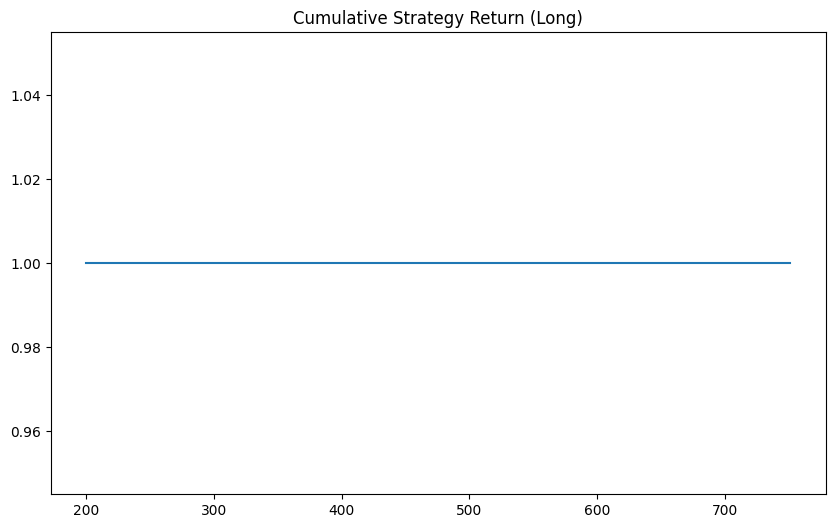

Accuracy: 0.5949367088607594
              precision    recall  f1-score   support

       False       0.59      1.00      0.75       329
        True       0.00      0.00      0.00       224

    accuracy                           0.59       553
   macro avg       0.30      0.50      0.37       553
weighted avg       0.35      0.59      0.44       553

Confusion Matrix:
Final capital: 100000


c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [12]:
# Probar la estrategia con el modelo SVM para "Long"
model = svm.SVC(C=0.01, kernel='rbf')
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Long'])
backtest_svm(data, model, 'Long', 0.05, 0.02, 100000)

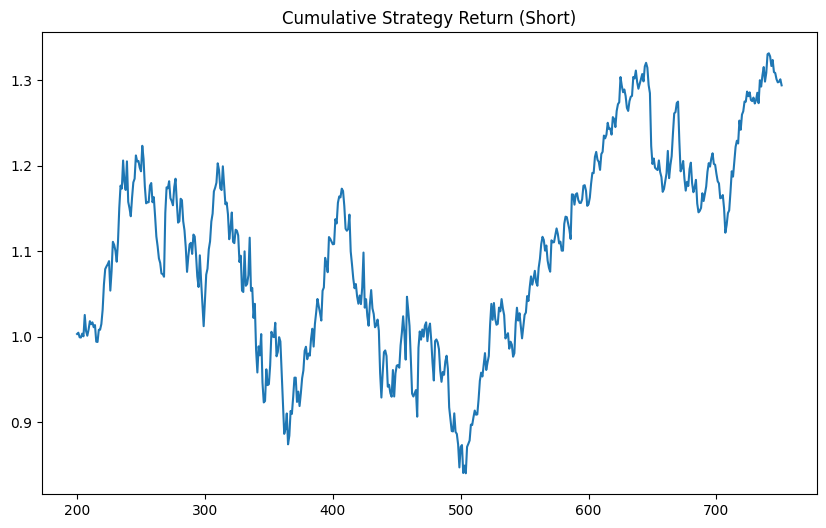

Accuracy: 0.5768535262206148
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       234
        True       0.58      1.00      0.73       319

    accuracy                           0.58       553
   macro avg       0.29      0.50      0.37       553
weighted avg       0.33      0.58      0.42       553

Confusion Matrix:
Final capital: 87714.62


c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pabul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [13]:
# Probar la estrategia con el modelo SVM para "Short"
model = svm.SVC(C=0.01, kernel='rbf')
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Short'])
backtest_svm(data, model, 'Short', 0.05, 0.02, 100000)

In [15]:
# Funcion de backtest para XGBoost

def backtest_xgboost(data, model, target, take_profit, stop_loss, initial_capital):
    # Crear una copia de los datos
    data = data.copy()
    
    # Crear una nueva columna con las predicciones del modelo
    data['Prediction'] = model.predict(data[['RSI', 'Ema 13', 'Ema 200']])
    
    # Calcular el rendimiento diario
    data['Return'] = data['Closet-1'] / data['Close'] - 1
    
    # Calcular el rendimiento diario de la estrategia
    data['Strategy Return'] = data['Return'] * data['Prediction']
    
    # Calcular el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'] = (data['Strategy Return'] + 1).cumprod()
    
    # Inicializar el capital
    capital = initial_capital
    
    # Inicializar el estado de la operación
    in_trade = False
    
    # Inicializar el precio de entrada
    entry_price = 0
    
    # Recorrer los datos
    for i in range(len(data)):
        # Si estamos en una operación
        if in_trade:
            # Si alcanzamos el take profit o el stop loss
            if data['Close'].iloc[i] >= entry_price * (1 + take_profit) or data['Close'].iloc[i] <= entry_price * (1 - stop_loss):
                # Salir de la operación
                in_trade = False
        # Si no estamos en una operación y el modelo predice una entrada
        elif data['Prediction'].iloc[i] == 1:
            # Entrar en la operación
            in_trade = True
            entry_price = data['Close'].iloc[i]
            capital -= entry_price  # Descontar el precio de entrada del capital
    
    # Graficar el rendimiento acumulado de la estrategia
    data['Cumulative Strategy Return'].plot(figsize=(10, 6))
    plt.title(f'Cumulative Strategy Return ({target})')
    plt.show()
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(data[target], data['Prediction'])
    print("Accuracy:", accuracy)
    
    # Imprimir el informe de clasificación
    print(classification_report(data[target], data['Prediction']))
    
    # Imprimir la matriz de confusión
    print("Confusion Matrix:")

    # Imprimir el capital final
    print("Final capital:", capital)

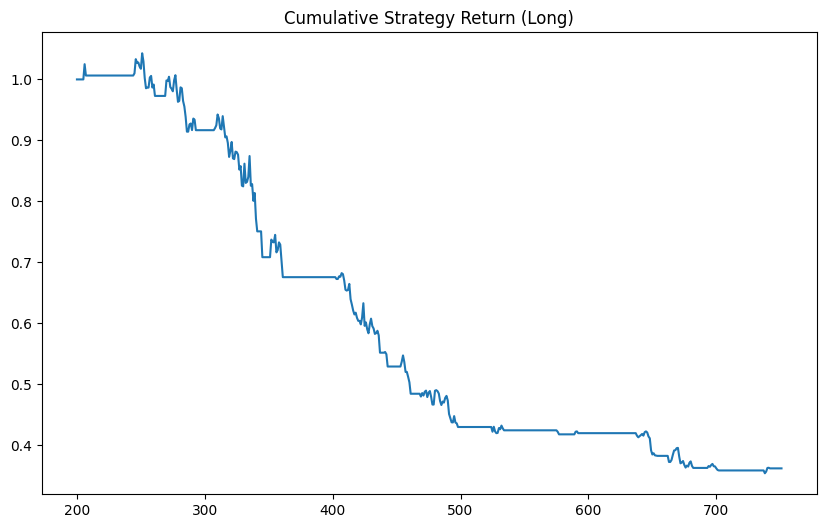

Accuracy: 0.9855334538878843
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       329
        True       0.98      0.98      0.98       224

    accuracy                           0.99       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.99      0.99      0.99       553

Confusion Matrix:
Final capital: 93506.90999999993


In [16]:
# Probar la estrategia con el modelo XGBoost para "Long"
model = xgb.XGBClassifier(eta=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8)
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Long'])
backtest_xgboost(data, model, 'Long', 0.05, 0.02, 100000)

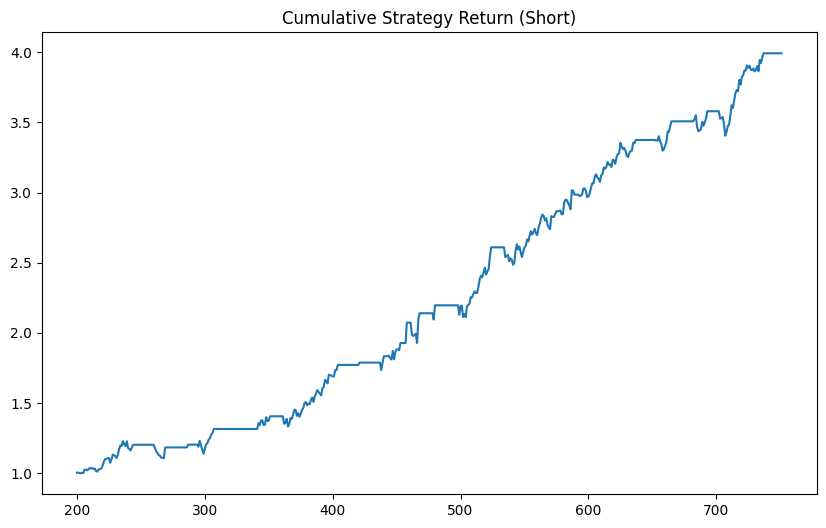

Accuracy: 0.9891500904159132
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       234
        True       0.98      1.00      0.99       319

    accuracy                           0.99       553
   macro avg       0.99      0.99      0.99       553
weighted avg       0.99      0.99      0.99       553

Confusion Matrix:
Final capital: 91265.06999999998


In [17]:
# Probar la estrategia con el modelo XGBoost para "Short"
model = xgb.XGBClassifier(eta=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8)
model.fit(data[['RSI', 'Ema 13', 'Ema 200']], data['Short'])
backtest_xgboost(data, model, 'Short', 0.05, 0.02, 100000)

## Conclusiones 
Despues de realizar el backtesing a los distintos modelos podemos condluir que las mejores estrategias son las siguientes:
el mejor modelo para "short" es el modelo de XGBoost, mientras que para "Long" el mejor modelo es Logistic Reression.

Pudimos notar la eficacia de los modelos XGBoost y Logistic Regression para generar un profit sustancial lo cual demuestra la capacidad que tienen ambos modelos para poder identificar y aplicar las señales en los patrones plasmados en los datos historicos lo que respalda la utilidad de ambos modelos de aprendizaje automatizado al momento de tomar decisiones.

Podemos notar que es mucho mejor para los inversionistas a la hora de la toma de decisiones anticipadas gracias al analisis predictivo que podemos obtener gracias a los modelos de aprendizaje automatico.
Debemos recalcar la importancia de que se rrealicen tanto la optimizcione como el backtesting ya que son de suma i,portancia parapoder identificar y validar estrategias las cuales nos permitan disminuir el riesgo de las mismas y obtener los mejores resultados, en este caso las ganancias.